In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# (a)

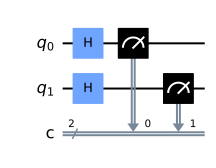

In [2]:
circuit = QuantumCircuit(2, 2)
circuit.h([0, 1])
circuit.measure([0, 1], [0, 1])
circuit.draw()

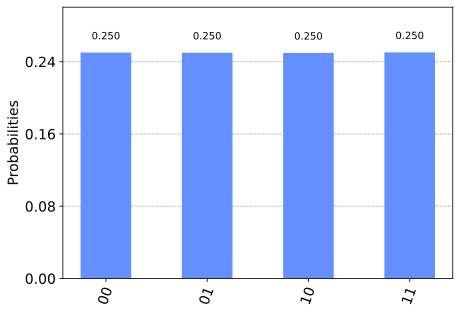

In [3]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

# (b)

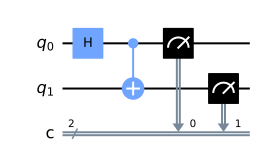

In [4]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()

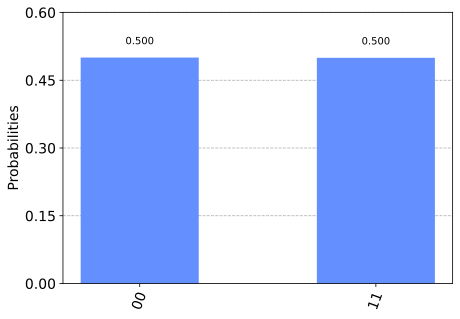

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Since '0' and '0' come in pairs, '1' and '1' come in pairs,  if Alice gets '1', Bob gets '1', too.$_\#$
### The probability of '1' from the first register is 1/2.$_\#$

# (c)

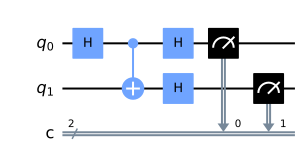

In [6]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.h([0, 1])
circuit.measure([0, 1], [0, 1])
circuit.draw()

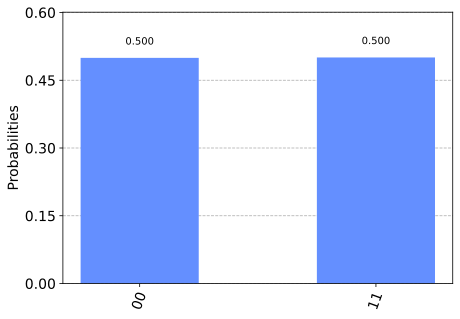

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### It seems like it's entangled no matter in what basis it's measured.

# (d)

### The $|\Phi^{+}\rangle$ is created by applying H gate and CNOT gate on $|00\rangle$.

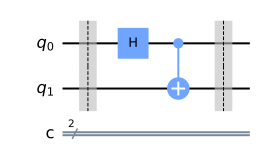

In [8]:
circuit = QuantumCircuit(2, 2)
circuit.barrier()
circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

circuit.draw()

In [9]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### This is $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt2}$.

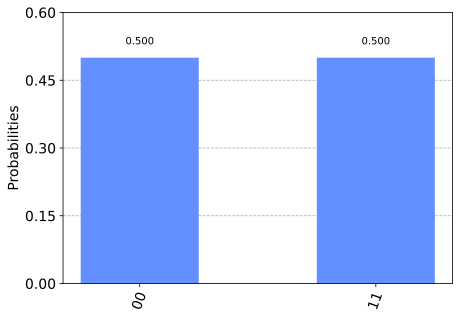

In [10]:
circuit.measure([0, 1], [0, 1])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### From (b), we know that $|\Phi^+\rangle$ has equal probability on getting $|00\rangle$ and getting $|11\rangle$.

### Now, to find the states orthogonal to $|\Phi^+\rangle$, try apply `H` and `CNOT` on the three states orthogonal to $|00\rangle$, which are $|01\rangle$, $|01\rangle$, and $|01\rangle$.

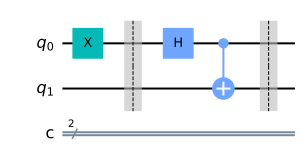

In [11]:
circuit = QuantumCircuit(2, 2)
circuit.x(0)
circuit.barrier()
circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

circuit.draw()

In [12]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

[ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


### This is $|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt2}$.

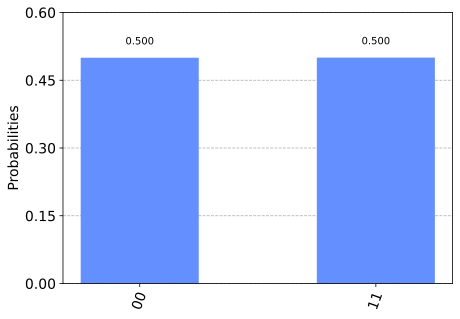

In [13]:
circuit.measure([0, 1], [0, 1])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### $|\Phi^-\rangle$ also has equal probability on getting $|00\rangle$ and getting $|11\rangle$ as $|\Phi^+\rangle$ does.

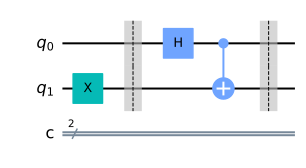

In [14]:
circuit = QuantumCircuit(2, 2)
circuit.x(1)
circuit.barrier()
circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

circuit.draw()

In [15]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


### This is $|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt2}$.

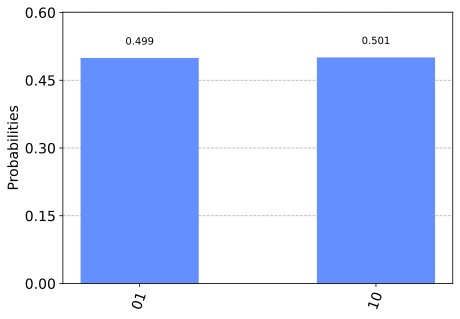

In [16]:
circuit.measure([0, 1], [0, 1])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### $|\Psi^+\rangle$ has equal probability on getting $|01\rangle$ and getting $|10\rangle$.

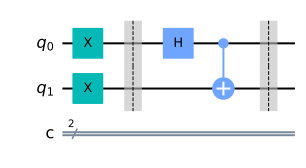

In [17]:
circuit = QuantumCircuit(2, 2)
circuit.x([0, 1])
circuit.barrier()
circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

circuit.draw()

In [18]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


### This is $|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt2}$.

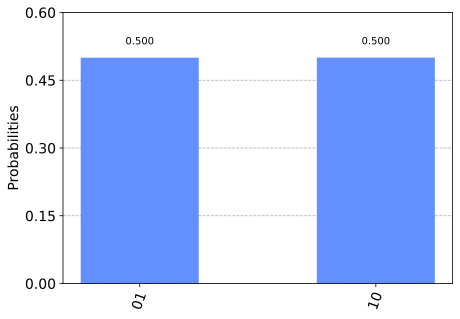

In [19]:
circuit.measure([0, 1], [0, 1])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### $|\Psi^-\rangle$ also has equal probability on getting $|01\rangle$ and getting $|10\rangle$ as $|\Psi^+\rangle$ does.

# (e)

### To prepare a not so naïve 2-qubit state, let's use `random_statevector()`.

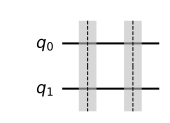

In [20]:
from qiskit.quantum_info import random_statevector

num_qubits = 2
psi = random_statevector(2 ** num_qubits)

circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

circ.draw()

[-0.25395623-0.44022658j  0.20136668-0.36106992j -0.16697603+0.29242746j
 -0.24262237-0.63128942j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


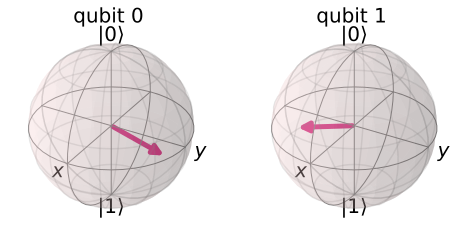

In [21]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circ, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

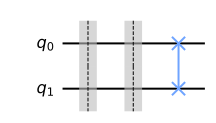

In [22]:
circ.swap(1, 0)

circ.draw()

[-0.25395623-0.44022658j -0.16697603+0.29242746j  0.20136668-0.36106992j
 -0.24262237-0.63128942j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


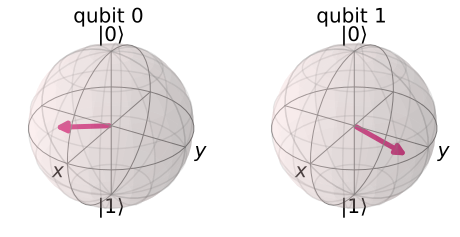

In [23]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circ, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

### It seems like the `swap` gate makes the two qubits switch place.

### Now, let's try and prove that three `cnot` gates in this special arrangement is equivilant to the `swap` gate.

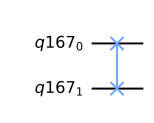

In [24]:
from qiskit import QuantumRegister, BasicAer, transpile

q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.swap(q[0],q[1])

qc.draw()

### Let's verify by checking their transform matrices.

In [25]:
backend = BasicAer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
swap_matrix = job.result().get_unitary(qc, decimals=3)

print(swap_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


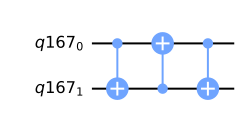

In [26]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])

qc.draw()

In [27]:
job = backend.run(transpile(qc, backend))
cxcxcx_matrix = job.result().get_unitary(qc, decimals=3)

print(cxcxcx_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [28]:
print(swap_matrix == cxcxcx_matrix)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


### For their matrices are the same, we know they work the same.$_\#$